<a href="https://colab.research.google.com/github/NilaabhKeshav/Reinforcement-Learning/blob/master/thompson_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thompson Sampling

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [3]:
#For beta distribution
import random
N = 5000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_rewards = 0
for n in range(0, N):
    #index of ad selected in each round
    ad = 0
    #max of the random draws
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if(random_beta > max_random):
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if(reward == 1):
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    elif(reward == 0):
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_rewards = total_rewards + reward

## Visualising the results - Histogram

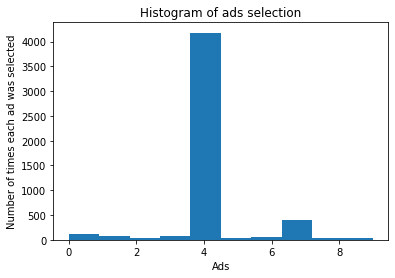

In [4]:
plt.hist(ads_selected)
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.title('Histogram of ads selection')
plt.show()